The given dataset contains demographic information about the patients of a clinic.

Our target is to generate a neural network model to predict the percentage of patients at the clinic who will use online appointments.

**Summary of the model:**

1. Relaced cells with values 0f -97 & -98 to NaN.
2. Generated a dataframe.
3. Dropped the rows with null values. Dropped the ClinicID column fron the dataframe.
4. Converted categorical variable (vendor) to numerical variables.
5. Divided dataset to train and validation/test sets in 60-40 ratio.
6. Generated a baseline model.
7. Generated a regularized model.


**Naive Approach:** For the given dataset we are to predict the percentage of patients at the clinic who will use online appointments. 

Thus, the naive approach is that the model's **'Mean Absolute Error' shoud be lesser than the dataset's 'Mean Average Deviation'.** 



**Baseline Model:**

1. The model has 1 Input layer, 6 hidden layers(20 nodes each), 1 Output layer.
2. Activation function = ReLu for all layers.
3. Loss = MSE, Optimizer = RMSPROP, Metric = MAE
4. **The baseline model built has a val_MAE 0.06556 . LOWER than the data's MAD which is 0.6759.**
5. Also there doesn't seem to be much of over-fitting.

**Regularized model:**

1. We increased the number of hidden layers and nodes per layer to the model.
2. L1 regularization has been implemented, to identify uninformative features and force their weights to be zero by subtracting a small amount from the weight at each iteration, eventually making it zero.
3. Learning rate was determined which is a tuning parameter in an optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.
4. **The regularized model built has a val_MAE of 0.6758. LOWER than the data's MAD which is 0.6759. But HIGHER than baseline model's val_MAE.**
5. Tnere does not seem to be over-fitting.

**Analysis:**

All the 3 models more or less work efficiently to predict the target variable. However, the baseline model has the least val_MAE. **Hence, we choose the baseline model to be the best model.**

1. Importing the required liabraries

In [ ]:
%tensorflow_version 2.X
from numpy.random import seed
seed(2)
#from tensorflow import set_random_seed
#set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.8.2


2. Loading the dataset and generating a dataframe

In [ ]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.2f}'.format

concrete_dataframe = pd.read_excel("OnlineUse.xlsx", "OnlineUseData")

concrete_dataframe = concrete_dataframe.reindex(np.random.permutation(concrete_dataframe.index))

In [ ]:
concrete_dataframe # Displaying the dataframe

,ClinicID,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,...,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
6248,6254,0.23,0.51,0.04,0.05,0.17,0.28,0.19,0.14,0.11,...,0.73,0.74,0.60,0.51,0.80,0.66,0.51,0.56,EMIS,7012
4833,4839,0.02,0.43,0.00,0.08,0.12,0.12,0.24,0.13,0.14,...,0.86,0.91,0.91,0.55,0.85,0.58,0.49,0.31,EMIS,13813
369,375,0.30,0.54,0.07,0.14,0.17,0.17,0.16,0.21,0.10,...,0.79,0.99,0.90,0.55,0.67,0.87,0.54,0.60,EMIS,13430
3678,3684,0.15,0.50,0.06,0.09,0.26,0.30,0.13,0.10,0.07,...,0.94,0.79,0.30,0.45,0.89,0.55,0.78,0.47,EMIS,3936
1715,1721,0.08,0.56,0.02,0.10,0.11,0.07,0.12,0.16,0.23,...,0.85,0.71,0.98,0.63,0.80,0.56,0.46,0.20,EMIS,10525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6443,6449,0.14,0.52,0.00,0.19,0.08,0.21,0.10,0.16,0.13,...,0.58,0.79,0.83,0.57,0.82,0.51,0.59,0.38,EMIS,9462
3606,3612,0.24,0.50,0.03,0.10,0.08,0.18,0.21,0.18,0.13,...,0.65,0.83,0.93,0.50,0.93,0.41,0.39,0.66,EMIS,13159
5704,5710,0.02,0.49,0.03,0.05,0.10,0.11,0.20,0.23,0.15,...,0.42,0.62,0.97,0.64,0.81,0.57,0.39,0.43,EMIS,6054
6637,6643,0.15,0.53,0.08,0.15,0.23,0.21,0.18,0.09,0.10,...,0.65,0.63,0.45,0.45,0.81,0.53,0.27,0.33,TPP,11390


In [ ]:
concrete_dataframe.shape[0]

6857

3. Dropping observations with no values

In [ ]:
# Dropping the rows with missing values.
concrete_dataframe = concrete_dataframe.dropna() 

In [ ]:
concrete_dataframe.shape[0]


6360

In [ ]:
# Dropping the CliniID column from the dataframe.
concrete_dataframe = concrete_dataframe.drop(columns=['ClinicID'])

In [ ]:
# Checking the data types for all columns in the dataframe.
print(concrete_dataframe.dtypes)

OnlineAppointmentUse    float64
malepct                 float64
unemp                   float64
age16to24               float64
age25to34               float64
                         ...   
reducedability          float64
prefgpalways            float64
bcaaware                float64
vendor                   object
numpats                   int64
Length: 21, dtype: object


4. Converting Object variables above to Integer variables

In [ ]:
concrete_dataframe["vendor"] = concrete_dataframe["vendor"].astype("category")

In [ ]:
concrete_dataframe["vendor"].cat.categories

Index(['EMIS', 'EMIS (I)', 'MICROTEST', 'TPP', 'VISION', 'VISION (I)'], dtype='object')

In [ ]:
concrete_dataframe["vendor"].replace(['EMIS', 'EMIS (I)', 'MICROTEST', 'TPP', 'VISION', 'VISION (I)'], [0, 1, 2, 3, 4, 5], inplace=True)



In [ ]:
concrete_dataframe["vendor"] = concrete_dataframe["vendor"].astype("int64")
concrete_dataframe.dtypes


OnlineAppointmentUse    float64
malepct                 float64
unemp                   float64
age16to24               float64
age25to34               float64
                         ...   
reducedability          float64
prefgpalways            float64
bcaaware                float64
vendor                    int64
numpats                   int64
Length: 21, dtype: object

5. Splitting the dataset to training and validation sets

In [ ]:
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(concrete_dataframe.drop(['OnlineAppointmentUse'], axis = 1)),
                         columns = concrete_dataframe.drop(['OnlineAppointmentUse'], axis = 1).columns)
# Category and Sex are categorical variables and hence need not get scaled
scaled_df

,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
0,0.28,0.06,-1.00,0.12,1.98,0.28,-0.46,-0.43,-0.83,-1.08,0.09,-0.25,-0.60,-0.21,-0.42,0.67,0.08,0.90,-0.85,-0.34
1,-1.16,-1.07,-0.45,-0.53,-0.68,1.41,-0.68,0.31,0.92,1.87,0.73,1.10,0.60,0.35,0.17,-0.21,-0.01,-0.68,-0.85,0.92
2,0.90,0.67,0.63,0.05,0.17,-0.39,1.21,-0.68,-0.68,-1.80,0.40,1.81,0.58,0.26,-1.97,2.90,0.26,1.17,-0.85,0.85
3,0.23,0.41,-0.30,1.35,2.25,-1.06,-1.45,-1.34,-1.15,-0.69,1.16,0.18,-1.79,-0.93,0.72,-0.46,1.53,0.36,-0.85,-0.91
4,1.30,-0.45,0.01,-0.76,-1.60,-1.36,-0.05,2.09,2.46,1.98,0.68,-0.55,0.88,1.30,-0.44,-0.33,-0.17,-1.36,-0.85,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6355,0.63,0.38,-0.03,0.27,-0.52,0.64,-0.49,0.18,0.45,-0.98,0.90,0.81,-0.84,1.03,0.17,-0.13,0.59,0.33,-0.85,-0.69
6356,0.52,-1.07,1.54,-1.13,0.80,-1.76,0.05,0.08,0.04,1.10,-0.73,0.14,0.31,0.50,-0.14,-0.95,0.50,-0.20,-0.85,0.11
6357,0.19,-0.38,-0.09,-1.09,0.24,0.82,0.44,0.12,0.43,-0.11,-0.32,0.48,0.69,-0.27,1.17,-1.97,-0.56,1.54,-0.85,0.80
6358,-0.09,-0.37,-0.92,-0.89,-0.86,0.50,1.64,0.52,0.84,1.57,-1.53,-1.25,0.85,1.32,-0.27,-0.24,-0.58,0.08,-0.85,-0.52


In [ ]:
df=concrete_dataframe[['OnlineAppointmentUse']]

concrete_dataframe = pd.concat([df,scaled_df],axis = 1)
concrete_dataframe

,OnlineAppointmentUse,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,...,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
0,0.06,0.28,0.06,-1.00,0.12,1.98,0.28,-0.46,-0.43,-0.83,...,0.09,-0.25,-0.60,-0.21,-0.42,0.67,0.08,0.90,-0.85,-0.34
1,0.13,-1.16,-1.07,-0.45,-0.53,-0.68,1.41,-0.68,0.31,0.92,...,0.73,1.10,0.60,0.35,0.17,-0.21,-0.01,-0.68,-0.85,0.92
2,0.06,0.90,0.67,0.63,0.05,0.17,-0.39,1.21,-0.68,-0.68,...,0.40,1.81,0.58,0.26,-1.97,2.90,0.26,1.17,-0.85,0.85
3,0.10,0.23,0.41,-0.30,1.35,2.25,-1.06,-1.45,-1.34,-1.15,...,1.16,0.18,-1.79,-0.93,0.72,-0.46,1.53,0.36,-0.85,-0.91
4,0.10,1.30,-0.45,0.01,-0.76,-1.60,-1.36,-0.05,2.09,2.46,...,0.68,-0.55,0.88,1.30,-0.44,-0.33,-0.17,-1.36,-0.85,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6851,0.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6852,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6853,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6855,0.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
x = concrete_dataframe.drop(columns=["OnlineAppointmentUse"])
y = concrete_dataframe["OnlineAppointmentUse"]

In [ ]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

In [ ]:
# Printing the first few rows of the training data
print("Training examples summary:")
display.display(train_x.describe())
print("Validation examples summary:")
display.display(valid_x.describe())

print("Training targets summary:")
display.display(train_y.describe())
print("Validation targets summary:")
display.display(valid_y.describe())

Training examples summary:


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
count,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00,3805.00
mean,0.01,0.01,-0.02,0.01,0.01,-0.01,-0.01,0.01,0.00,0.01,-0.00,-0.00,0.00,0.01,-0.00,0.00,-0.02,0.00,-0.00,0.01
std,0.99,1.02,0.99,0.99,1.00,0.99,0.99,0.99,0.99,1.00,0.99,0.99,1.00,1.01,1.01,1.00,1.00,1.00,1.00,1.02
min,-3.55,-1.07,-1.88,-2.21,-2.40,-3.33,-3.27,-2.73,-2.31,-1.80,-3.21,-4.75,-2.96,-3.78,-5.39,-3.17,-2.54,-2.55,-0.85,-1.41
25%,-0.63,-0.73,-0.67,-0.69,-0.71,-0.67,-0.64,-0.64,-0.70,-0.71,-0.69,-0.60,-0.49,-0.64,-0.57,-0.70,-0.74,-0.73,-0.85,-0.69
50%,-0.02,-0.27,-0.13,-0.11,-0.10,-0.01,0.04,0.00,-0.02,-0.11,0.15,0.12,0.44,0.05,0.13,-0.01,-0.08,0.01,-0.85,-0.19
75%,0.63,0.48,0.47,0.57,0.64,0.61,0.62,0.68,0.66,0.62,0.81,0.72,0.75,0.67,0.75,0.68,0.67,0.70,1.11,0.46
max,5.09,12.88,10.95,5.50,4.68,4.10,3.62,3.36,3.78,4.90,1.48,1.87,0.97,5.68,2.05,4.21,2.60,2.91,2.41,12.00


Validation examples summary:


,malepct,unemp,age16to24,age25to34,age35to44,age45to54,age55to64,age65to74,age75to84,age85plus,phoneeasy,onlineasy,race,longstdhealth,canmngownhealth,reducedability,prefgpalways,bcaaware,vendor,numpats
count,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00,2555.00
mean,-0.02,-0.01,0.03,-0.01,-0.01,0.01,0.01,-0.01,-0.00,-0.01,0.00,0.01,-0.00,-0.01,0.00,-0.00,0.03,-0.01,0.01,-0.02
std,1.01,0.98,1.02,1.01,1.00,1.01,1.01,1.01,1.01,1.00,1.02,1.01,1.00,0.99,0.99,1.00,1.00,1.01,1.01,0.97
min,-4.35,-1.07,-1.88,-2.21,-2.40,-4.25,-3.55,-2.73,-2.31,-1.80,-3.41,-6.38,-2.98,-3.85,-6.02,-3.12,-2.40,-2.59,-0.85,-1.34
25%,-0.70,-0.73,-0.61,-0.73,-0.74,-0.66,-0.63,-0.70,-0.72,-0.71,-0.68,-0.60,-0.52,-0.64,-0.56,-0.69,-0.72,-0.73,-0.85,-0.70
50%,-0.04,-0.27,-0.11,-0.15,-0.12,-0.02,0.05,0.01,-0.01,-0.12,0.16,0.15,0.45,0.04,0.14,-0.03,-0.00,-0.01,-0.85,-0.21
75%,0.60,0.44,0.49,0.55,0.60,0.66,0.67,0.66,0.66,0.58,0.84,0.73,0.75,0.70,0.72,0.68,0.75,0.73,1.11,0.44
max,4.40,4.88,11.29,7.21,4.23,4.13,3.52,3.87,3.62,6.61,1.48,1.87,0.97,3.08,2.05,4.21,2.61,2.94,2.41,9.20


Training targets summary:


count   3819.00
mean       0.14
std        0.09
min        0.00
25%        0.07
50%        0.12
75%        0.19
max        0.62
Name: OnlineAppointmentUse, dtype: float64

Validation targets summary:


count   2541.00
mean       0.14
std        0.09
min        0.00
25%        0.07
50%        0.12
75%        0.19
max        0.61
Name: OnlineAppointmentUse, dtype: float64

6. Determimg the baseline model and fitting the data to the model

In [ ]:
baseline_model = keras.Sequential([ 
    keras.layers.Dense(20, activation=tf.nn.relu, input_shape=(train_x.shape[1],)),
    # Input Layer
    keras.layers.Dense(20, activation=tf.nn.relu,), # 1st Hidden Layer
    keras.layers.Dense(20, activation=tf.nn.relu,), # 2nd Hidden Layer
    keras.layers.Dense(20, activation=tf.nn.relu,), # 3rd Hidden Layer
    keras.layers.Dense(20, activation=tf.nn.relu,), # 4th Hidden Layer
    keras.layers.Dense(20, activation=tf.nn.relu,), # 5th Hidden Layer
    keras.layers.Dense(20, activation=tf.nn.relu,), # 6th Hidden Layer
    keras.layers.Dense(1)]) # Output Layer


baseline_model.compile(loss='mse', 
                optimizer="rmsprop", 
                metrics=['mae']) 

 # The most commonly used loss function for regression. The loss is the mean 
 # overseen data of the squared differences between true and predicted values.

 # Mean Absolute Error (MAE) is a popular metric because the units 
 # of the error score match the units of the target value that is being predicted.

In [ ]:
baseline_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                420       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 20)                4

In [ ]:
epochs = 100

baseline_history = baseline_model.fit(train_x,
                    train_y,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (valid_x, valid_y))



Epoch 1/100
128/128 [==============================] - 2s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
128/128 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
128/128 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
128/128 [===========

In [ ]:
print(min(baseline_history.history['val_mae']))  # ACCURACY OF THE BASELINE_MODEL

nan


In [ ]:
train_y.mad() # mean average deviation (error if I use the average for prediction)

0.0676119464239628

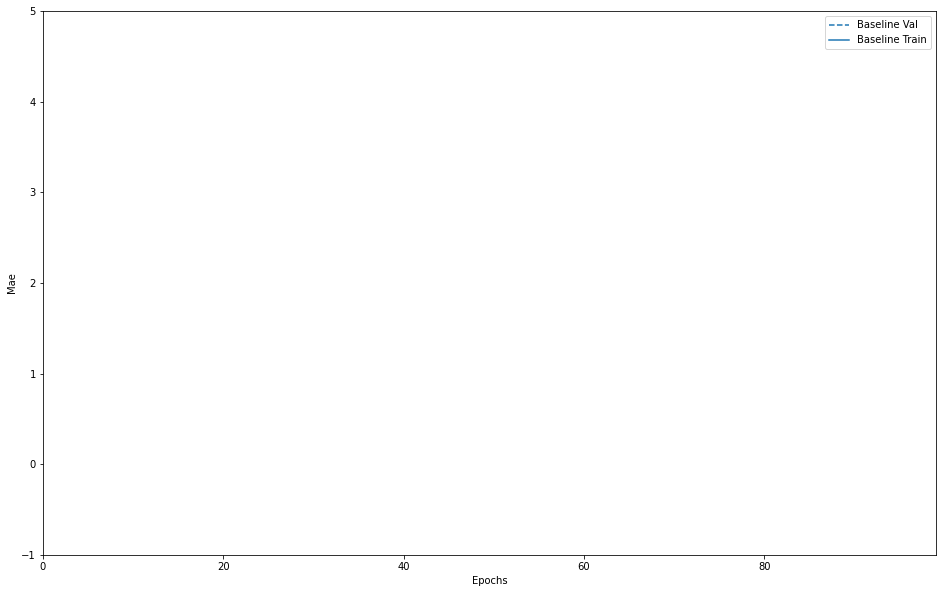

In [ ]:
import matplotlib.pyplot as plt


def plot_history(histories, key='mae'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([-1,5])

plot_history([('baseline', baseline_history)])

7. Trying to regularize the model

In [ ]:
l1_model = keras.Sequential([ keras.layers.Dense(32, kernel_regularizer=keras.regularizers.l1(0.1), activation=tf.nn.relu,
                       input_shape=(train_x.shape[1],)),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dense(32, use_bias=True, kernel_regularizer=keras.regularizers.l1(0.001), activation=tf.nn.relu),
    keras.layers.Dense(1)
  ])

l1_model.compile(loss='mse',
                optimizer="rmsprop",
                metrics=['mae'])

In [ ]:
l1_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                672       
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 32)                1056      
                                                                 
 dense_14 (Dense)            (None, 32)               

In [ ]:
epochs = 100

l1_history = l1_model.fit(train_x,
                    train_y,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (valid_x, valid_y))



Epoch 1/100
128/128 [==============================] - 2s 5ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/100
128/128 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 6/100
128/128 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 8/100
128/128 [==============================] - 0s 3ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 9/100
128/128 [===========

In [ ]:
print(min(l1_history.history['val_mae'])) #ACCURACY OF THE L1_MODEL

nan


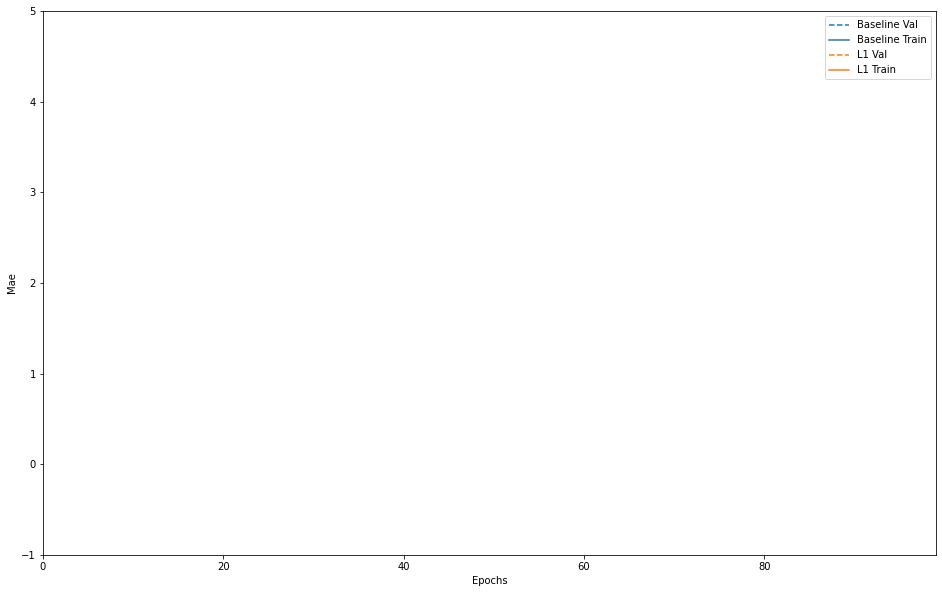

In [ ]:
# Plot history Multiple
plot_history([('baseline', baseline_history),
              ('L1', l1_history)])
             

In [ ]:
print(min(baseline_history.history['val_mae']))

nan


In [ ]:
train_y.mad()

0.0676119464239628

In [ ]:
print(min(l1_history.history['val_mae'])) 


nan
